In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [5]:
challenger_df = pd.read_csv('challenger.csv')
challenger_df[:10]

,o_ring_ct,distress_ct,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [8]:
X = challenger_df.drop(['distress_ct', 'o_ring_ct', 'launch_id'], axis=1)
X = np.array(X)
X

array([[ 66,  50],
       [ 70,  50],
       [ 69,  50],
       [ 68,  50],
       [ 67,  50],
       [ 72,  50],
       [ 73, 100],
       [ 70, 100],
       [ 57, 200],
       [ 63, 200],
       [ 70, 200],
       [ 78, 200],
       [ 67, 200],
       [ 53, 200],
       [ 67, 200],
       [ 75, 200],
       [ 70, 200],
       [ 81, 200],
       [ 76, 200],
       [ 79, 200],
       [ 75, 200],
       [ 76, 200],
       [ 58, 200]])

In [9]:
y = challenger_df['distress_ct']
y = np.array(y)
y

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [11]:
for a, b in zip(X_train[:10], y_train[:10]):
    print(a, b)

[67 50] 0
[69 50] 0
[72 50] 0
[ 76 200] 0
[ 63 200] 1
[ 70 100] 0
[ 79 200] 0
[68 50] 0
[66 50] 0
[ 75 200] 0


In [12]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [13]:
y_pred = model.predict(X_test)
y_pred = np.ceil(y_pred)

y_actual = y_test

In [15]:
mean_squared_error(y_actual, y_pred)

0.33333333333333331

In [16]:
# Test R^2
print(model.score(X_test, y_actual))

-0.155555555556


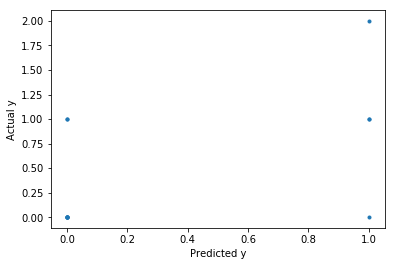

In [17]:
plt.scatter(y_pred, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()

In [18]:
for a, b in zip(y_pred, y_actual):
    print("Predicted = {0}, Actual = {1}".format(a, b))

Predicted = 0.0, Actual = 0
Predicted = 0.0, Actual = 1
Predicted = 0.0, Actual = 0
Predicted = 1.0, Actual = 0
Predicted = 0.0, Actual = 0
Predicted = 0.0, Actual = 1
Predicted = 1.0, Actual = 2
Predicted = 1.0, Actual = 1
Predicted = 0.0, Actual = 0
Predicted = 1.0, Actual = 1
Predicted = 0.0, Actual = 0
Predicted = 0.0, Actual = 0


## Exercises

1. Try adjusting $k$ (the number of neigbours) to see how this affects the results.
2. How often do we predict that an O-ring failed when in fact no O-rings have failed? (*false positives*. Note that a "positive" result is when an O-ring actually fails!)
3. How often do we predict that no O-ring has failed when in fact some O-rings have failed? (*false negatives*)
4. Both of the above two cases are examples of model mispredictions. In this particular case, what type of misprediction is worse: having a high number of false positives or a high number of false negatives?
5. We've only evaluated the performance of the model over the test set. Without changing any code, how would you expect k-NN to perform over the training set? Now try evaluating the performance of the model over the training set to see if you were correct.

MSE of model 2: 0.25
R^2 of model 2: -0.155555555556


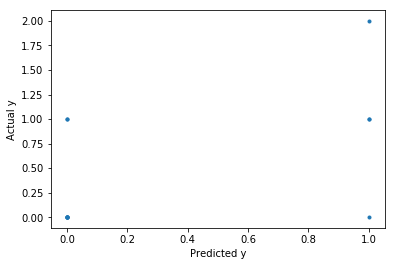

Predicted = 0.0, Actual = 0
Predicted = 0.0, Actual = 1
Predicted = 0.0, Actual = 0
Predicted = 0.0, Actual = 0
Predicted = 0.0, Actual = 0
Predicted = 0.0, Actual = 1
Predicted = 1.0, Actual = 2
Predicted = 1.0, Actual = 1
Predicted = 0.0, Actual = 0
Predicted = 1.0, Actual = 1
Predicted = 0.0, Actual = 0
Predicted = 0.0, Actual = 0


In [27]:
model2 = KNeighborsRegressor(n_neighbors=1)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
y_pred2 = np.ceil(y_pred2)
y_actual2 = y_test

print('MSE of model 2:', mean_squared_error(y_actual2, y_pred2))
# Test R^2
print('R^2 of model 2:', model.score(X_test, y_actual2))

plt.scatter(y_pred, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()

for a, b in zip(y_pred2, y_actual2):
    print("Predicted = {0}, Actual = {1}".format(a, b))

In [ ]:
y_pred2 = model2.predict(X_test)
y_pred2 = np.ceil(y_pred2)
y_actual2 = y_train

print('MSE of model 2:', mean_squared_error(y_actual2, y_pred2))
# Test R^2
print('R^2 of model 2:', model.score(X_test, y_actual2))

plt.scatter(y_pred, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()

for a, b in zip(y_pred2, y_actual2):
    print("Predicted = {0}, Actual = {1}".format(a, b))

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [29]:
X, y = np.arange(40).reshape((20, 2)), range(20)
X[:5]

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [22]:
for a, b in zip(X_train, y_train):
    print('input variable is: {0}, output variable is: {1}'.format(a, b))

input variable is: [8 9], output variable is: 4
input variable is: [18 19], output variable is: 9
input variable is: [2 3], output variable is: 1
input variable is: [12 13], output variable is: 6
input variable is: [14 15], output variable is: 7
input variable is: [6 7], output variable is: 3
input variable is: [0 1], output variable is: 0
input variable is: [10 11], output variable is: 5


In [23]:
for c, d in zip(X_test, y_test):
    print('input variable is: {0}, output variable is: {1}'.format(c, d))

input variable is: [4 5], output variable is: 2
input variable is: [16 17], output variable is: 8


In [30]:
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)

NameError: name 'KNeighborsRegressor' is not defined